In [ ]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [29]:
def generate_random_numbers(n, mu, sigma, dist="normal"):
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
         return np.random.uniform(mu-sigma/sqrt(3), mu+sigma/sqrt(3),n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        

C:\Users\chris\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\chris\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

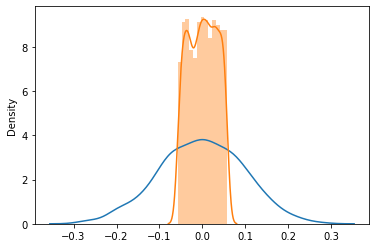

In [30]:
# test your code:
y_test = generate_random_numbers(1000, 0, 0.1, "normal")
y_uniform=generate_random_numbers(2000,0,0.1,"uniform")
sns.distplot(y_test,hist = False, kde = True)
sns.distplot(y_uniform,hist=True,kde=True)
# print(y_test)

In [31]:
y1 = generate_random_numbers(10, 0.5, 1.0, "normal")
y2 = generate_random_numbers(10, 0.5, 1.0, "uniform")
#print(y2)

In [32]:
# IGD, the ordering is permitted to have replacement.
def IGD_wr_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x0=0
    obj_function=[]
    x=[x0]
    for k in range(n):
        gamma_k=1/(k+1)
        x1=x0-gamma_k*(x0-y[ordering[k]])
        x0=x1
        obj_function.append(1/2*sum((x1-y)**2))
        x.append(x1)
    return obj_function,x1,x


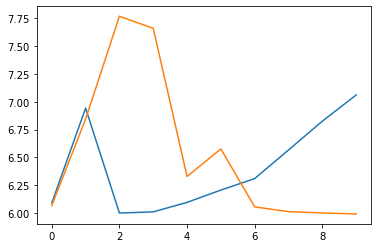

In [33]:
obj_function_norm_1,xk_norm_1,x_norm_1=IGD_wr_task1(y1)
obj_function_norm_2,xk_norm_2,x_norm_2=IGD_wo_task1(y1)
for history in [obj_function_norm_1,obj_function_norm_2]:
    plt.plot(history)
obj_function_uniform_1,xk_uniform_1,x_uniform_1=IGD_wr_task1(y2)
obj_function_uniform_2,xk_uniform_2,x_uniform_2=IGD_wo_task1(y2)
#plot the history

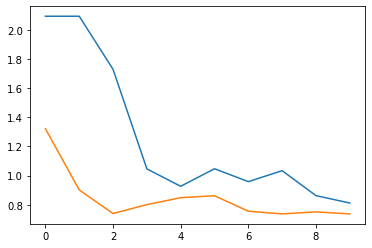

In [24]:
for history in [obj_function_uniform_1,obj_function_uniform_2]:
    plt.plot(history)

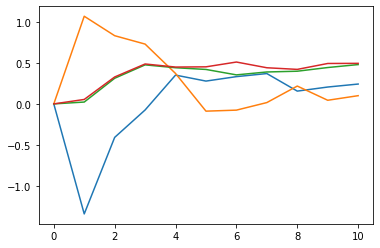

In [13]:
'''plot the xk'''
for x in [x_norm_1,x_norm_2]:
    plt.plot(x)
for x in [x_uniform_1,x_uniform_2]:
    plt.plot(x)